In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [115]:
df=pd.read_csv('Bethany.csv')
df.head()

,year,type of contact
0,2020,positive pulnomary
1,2020,positive pulnomary
2,2020,positive pulnomary
3,2020,positive pulnomary
4,2020,positive pulnomary


In [121]:
df.count()

year               205
type of contact    205
dtype: int64

In [116]:
column_names= df.columns 
print(column_names)


Index(['year', 'type of contact'], dtype='object')


In [117]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

type of contact has ['positive pulnomary' 'negative pulnomary' 'positive non pulnomary'
 'negative non pulnomary'] values



In [118]:
unique_types = df['type of contact'].unique();
type_counts = df['type of contact'].value_counts()

num_unique_types = len(unique_types)
print(type_counts)

type of contact
negative pulnomary        129
negative non pulnomary     44
positive pulnomary         23
positive non pulnomary      9
Name: count, dtype: int64


In [119]:
## 0 = Positive Pulnomary
## 1 = Negative Pulnomary
## 2 = Positive non Pulnomary
## 3 = Negative non Pulnomary

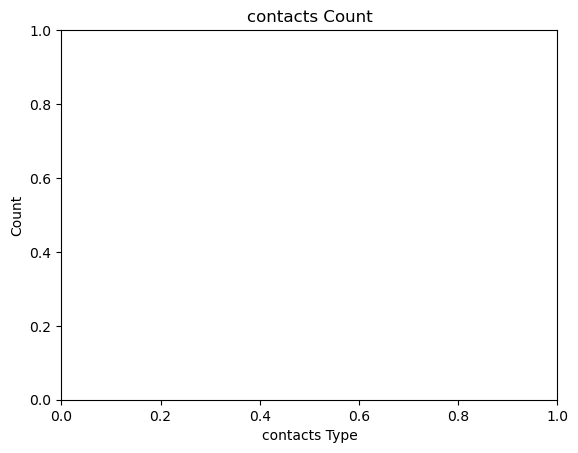

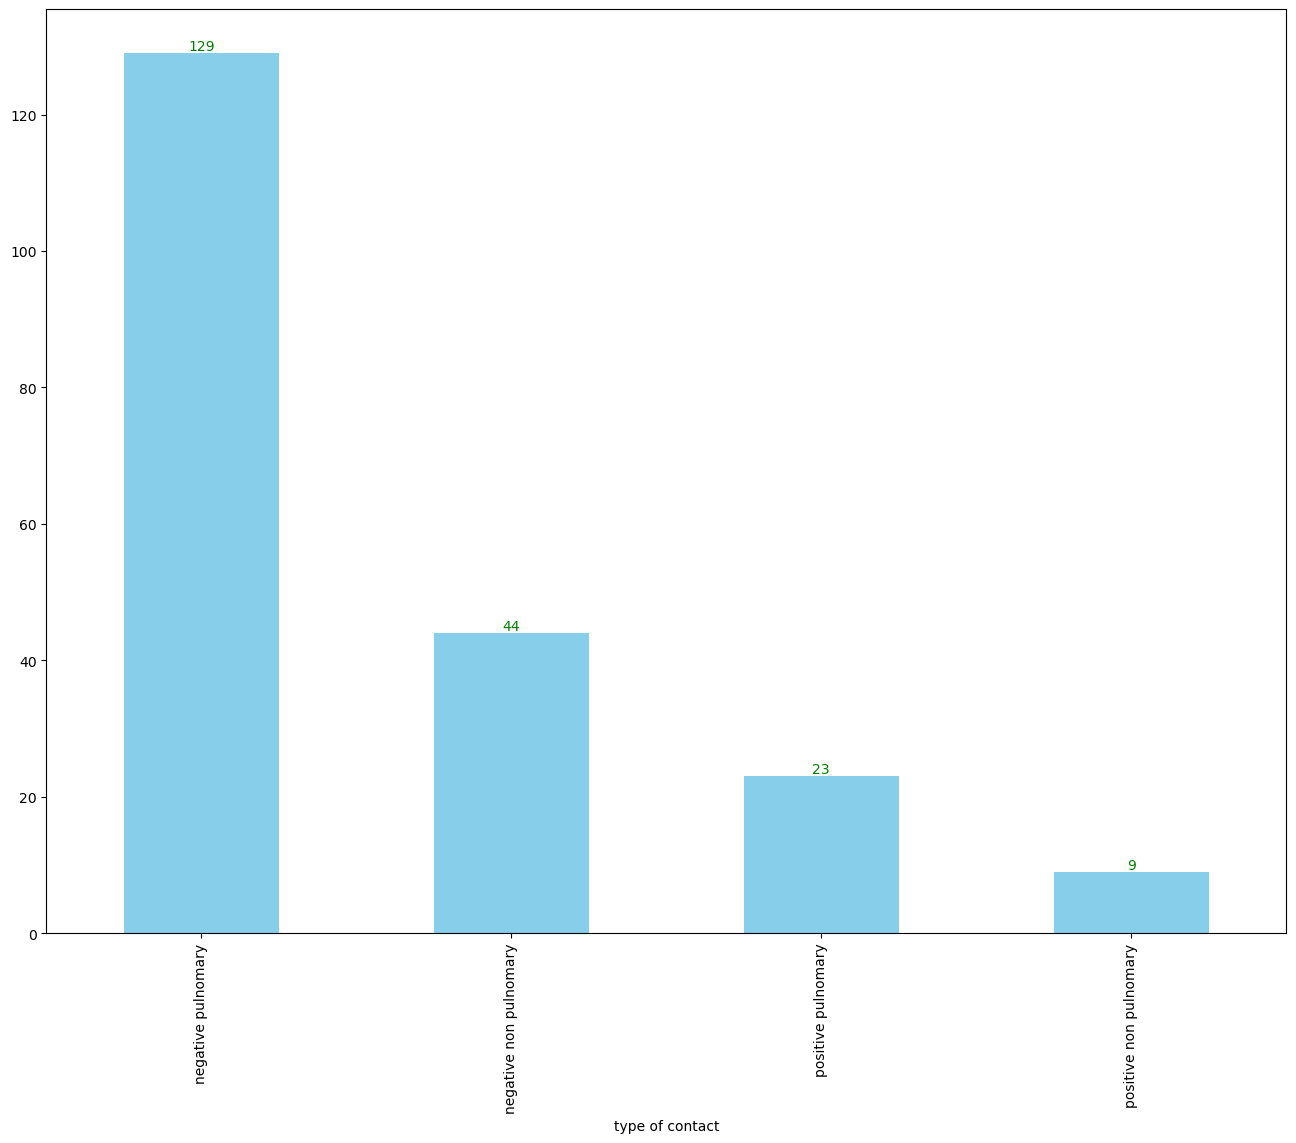

In [120]:
# above are the total four types of contact, dataset, has shown that cashout type of a transaction has the highest number of a transaction among all of the other types, payment type comes second cashin third transfer fourth and debit type pf a transaction comes fifth 
plt.title('contacts Count')
plt.xlabel('contacts Type')
plt.ylabel('Count')
plt.figure(figsize=(16,12))
bars= type_counts.plot(kind='bar', color='skyblue')

## label data on top of each bar
for bar in bars.patches:
    yval= bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2, yval+0, f'{yval:,.0f}', ha ='center', va = 'bottom', fontsize= 10, color= 'green')

## format
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value,_:f'{value:,.0f}'))
plt.show()

In [104]:
# converting strings to float
df['type of contact']=df['type of contact'].replace(to_replace={'positive pulnomary':0,'negative pulnomary':1,'positive non pulnomary':2, 'negative non pulnomary':3})


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year             207 non-null    int64
 1   type of contact  207 non-null    int64
dtypes: int64(2)
memory usage: 3.4 KB


In [71]:
df.describe()

,year,Gender
count,207.000000,207.000000
mean,2020.908213,1.357488
std,0.779769,0.938771
min,2020.000000,0.000000
25%,2020.000000,1.000000
50%,2021.000000,1.000000
75%,2022.000000,2.000000
max,2022.000000,3.000000


/var/folders/70/zcppwt790svbctwyy4ddlw5w0000gn/T/ipykernel_2058/130469268.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/70/zcppwt790svbctwyy4ddlw5w0000gn/T/ipykernel_2058/130469268.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


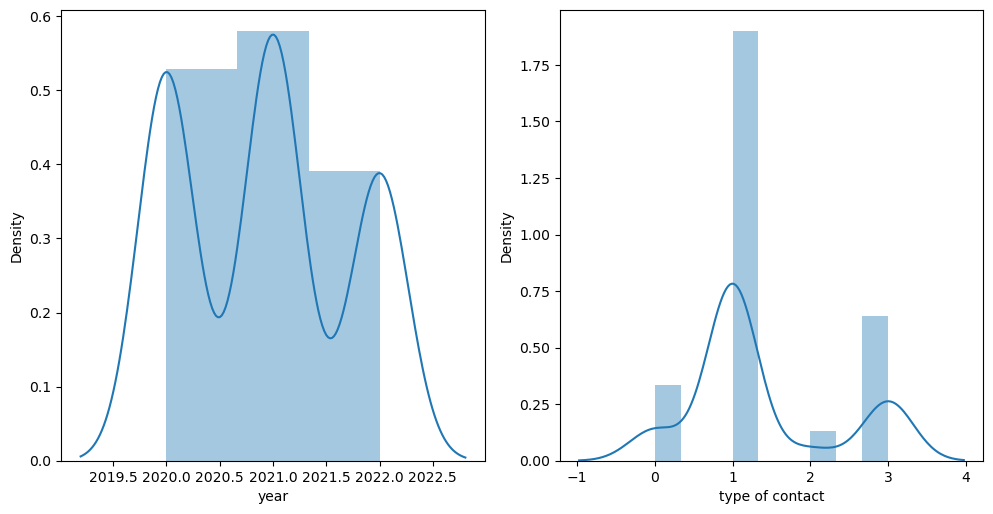

In [82]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# above are a total of five type of transactions, dataset, has shown that cashout type of a transaction has the highest number of a transaction among all of the other types, payment type comes second cashin third transfer fourth and debit type pf a transaction comes fifth 
plt.title('contacts Count')
plt.xlabel('contacts Type')
plt.ylabel('Count')
plt.figure(figsize=(16,12))
bars= type_counts.plot(kind='bar', color='skyblue')

## label data on top of each bar
for bar in bars.patches:
    yval= bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2, yval+20000, f'{yval:,.0f}', ha ='center', va = 'bottom', fontsize= 10, color= 'green')

## format
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value,_:f'{value:,.0f}'))
plt.show()

In [123]:
def violin(col):
    fig = px.violin(df, y=col, x='type of contact', color='type of contact', box=True, template = 'plotly_dark')
    return fig.show()

    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color='type of contact',template = 'plotly_dark')
    return fig.show()


In [124]:
violin('year')

In [125]:
scatter('year','type of contact')

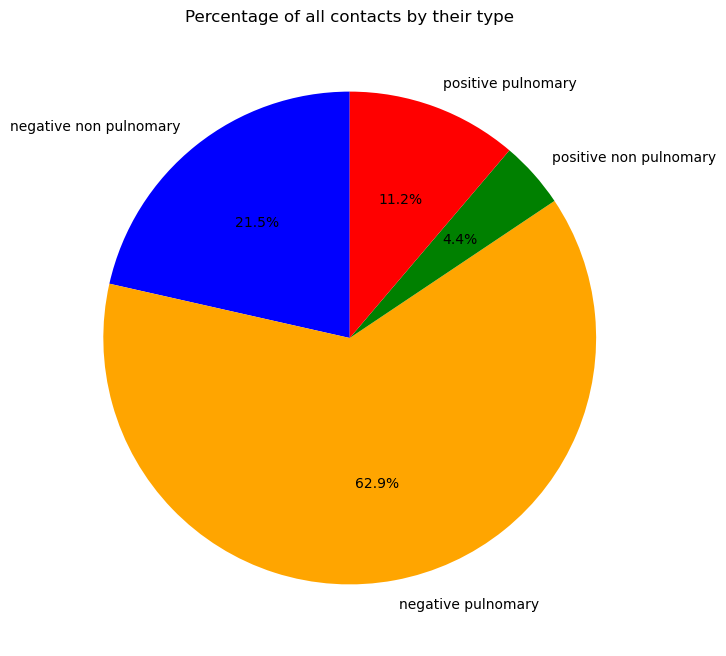

In [126]:
all_counts_by_type = df.groupby('type of contact').size()
plt.figure(figsize=(10,8))
plt.title('Percentage of all contacts by their type')
plt.pie(all_counts_by_type, labels= all_counts_by_type.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red', 'yellow'])
plt.show()